In [2]:
import import_ipynb
from mlwpy import *
%matplotlib inline

importing Jupyter notebook from mlwpy.ipynb


In [4]:
# 2.4 Probability
np.random.randint(1, 7)

5

In [5]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size = 100)

<BarContainer object of 6 artists>

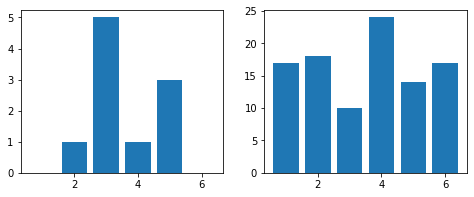

In [7]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)